# Final Assessment
**Mohoh dibaca terlebih dahulu:**
* Dalam notebook ini anda akan mengerjakan assessment **acara 2, 6, dan 7.**
* Waktu yang diberikan adalah **24 jam** terhitung dari **tanggal ... jam ..**
* Anda bebas menulis script/kode yang diinginkan selama itu mengasilkan hasil yang sama dengan clue jawaban. Clue jawaban berupa gambar yang terlampir pada tiap cell dibawah cell kode yang anda tulis.
* Gambar yang ada dalam notebook ini merupakan hasil yang diharapkan muncul ketika anda berhasil menulisakan kode yang benar. Gambar ini juga menjadi patokan output kode anda, Sehingga nantinya akan muncul 2 gambar yang serupa ketika anda berhasil running kode yang benar.
* Silahkan menjawab pertanyaan yang ada dalam notebook ini lansung pada cell yang disediakan.
* Selamat mengerjakan

In [1]:
#cek lokasi directory kerja
#perhatikan letak data dan file input pada directory
#jika lokasi data dan file berbeda dengan directory kerja, 
#maka pastikan bahwa anda mengakses file dan data yang berada pada directory yang berbeda
#cara lainnya adalah memindahkan data dan file input ke directory kerja
!pwd

/home/ahmadardi/final_assessment


## Acara 2. _Sequence Alignment_
Dalam acara ini, akan akan mengerjakan dot plot dan sequence alignment local maupun global. 

### 2.1 Dot Plot

In [2]:
# load Library
from IPython.display import Image

**Info terkait sequence yang digunakan**

Silahkan klik accession number dibawah ini untuk mengetahui lebih detail.
- [NM_000207.3](https://www.ncbi.nlm.nih.gov/nuccore/NM_000207.3/)
- [NM_008386.4](https://www.ncbi.nlm.nih.gov/nuccore/NM_008386.4)

Draw a threshold dotplot of two sequences
Created 01_NM_000207.1.png


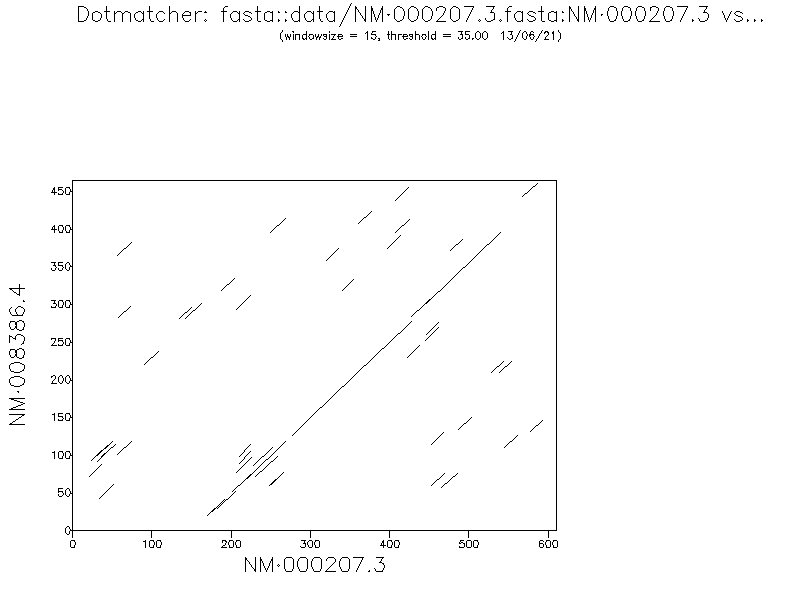

In [3]:
#silahkan menuliskan kode anda disini
! dotmatcher -windowsize 15 -threshold 35 data/NM_000207.3.fasta data/NM_008386.4.fasta -graph png -goutfile 01_NM_000207
Image(filename="01_NM_000207.1.png")

![hasil dotplot nm](pictures/01_NM_000207_1.png)

**Pertanyaan**
* Bagaimana interpretasi dari hasil dot plot diatas? apakah terdapat kemiripan antar kedua sequence diatas?

**Jawaban**
* (Tuliskan jawaban disini)

### 2.2 Sequence Aligmnet - Local and Global Aligment
#### Local Alignment menggunakan algoritma Waterman
Useful link: http://rna.informatik.uni-freiburg.de/Teaching/index.jsp?toolName=Smith-Waterman

In [5]:
! matcher data/NM_000207.3.fasta data/NM_008386.4.fasta stdout

Waterman-Eggert local alignment of two sequences
########################################
# Program: matcher
# Rundate: Sun 13 Jun 2021 13:57:46
# Commandline: matcher
#    [-asequence] data/NM_000207.3.fasta
#    [-bsequence] data/NM_008386.4.fasta
#    [-outfile] stdout
# Align_format: markx0
# Report_file: stdout
########################################

#=======================================
#
# Aligned_sequences: 2
# 1: NM_000207.3
# 2: NM_008386.4
# Matrix: EDNAFULL
# Gap_penalty: 16
# Extend_penalty: 4
#
# Length: 421
# Identity:     321/421 (76.2%)
# Similarity:   321/421 (76.2%)
# Gaps:          15/421 ( 3.6%)
# Score: 1133
# 
#
#=======================================

               10        20        30           40       
NM_000 AGCCCTCCAGGACAGGCTGCATCAGAAGAGGCCATCA---AGCAGATCAC
       ::::::    :::  :::  :: :  :::: ::::::   ::::: ::: 
NM_008 AGCCCTTAGTGACCAGCT--ATAATCAGAGACCATCAGCAAGCAGGTCAT
            160       170         180       190       200

        50        6

**Hasil Scoring local alignment**

Gambar dibawah ini hanya sepenggal dari output cell dari kode yang benar.

![hasil local alignment](pictures/2.2_sequence_alignmnet.PNG)

#### Global Alignment menggunakan algoritma Needleman-Wunsch

In [6]:
! needle data/NM_000207.3.fasta data/NM_008386.4.fasta stdout -auto

########################################
# Program: needle
# Rundate: Sun 13 Jun 2021 13:58:12
# Commandline: needle
#    [-asequence] data/NM_000207.3.fasta
#    [-bsequence] data/NM_008386.4.fasta
#    [-outfile] stdout
#    -auto
# Align_format: srspair
# Report_file: stdout
########################################

#=======================================
#
# Aligned_sequences: 2
# 1: NM_000207.3
# 2: NM_008386.4
# Matrix: EDNAFULL
# Gap_penalty: 10.0
# Extend_penalty: 0.5
#
# Length: 652
# Identity:     351/652 (53.8%)
# Similarity:   351/652 (53.8%)
# Gaps:         228/652 (35.0%)
# Score: 1283.5
# 
#
#=======================================

NM_000207.3        0 --------------------------------------------------      0
                                                                       
NM_008386.4        1 ACCAGGCAAGTGTTTGGAAACTGCAGCTTCAGCCCCTCTGGCCATCTGCC     50

NM_000207.3        0 --------------------------------------------------      0
                                 

**Hasil Scoring global alignment**

Gambar dibawah ini hanya sepenggal dari output cell dari kode yang benar.

![2.3 global alignmrenyt](pictures/2.3_sequence_alignmnet_global.PNG)

**Pertanyaan**
* Apakah terdapat perbedaan hasil antara local dan global alignment? Bagaimana kedua alignmnet tersebut menghasilkan hasil yang berbeda? dan bagaimana prinsip dasar local dan global aligment?

**Jawaban** 
* (silahkan menuliskan jawabannya disini)

## 6. NGS with Variant Calling
Dalam acara ini akan dilakukan analisis variant calling hingga mengasilkan output berupa lokasi SNP sequence HBA2 dan visualisasi menggunakan IGV. 

*Clue: Akan ada 2 lokasi SNP pada sequence HBA2! 

### 6.1 Konversi SAM ke (sorted) BAM
Silahkan edit kode dibawah ini sehingga mengasilkan output sesuai gambar pada step 6.4

In [8]:
#Sampel 1
! samtools view -bS data/1_HBA2.sam > 1_HBA2.bam #konversi SAM ke BAM
! samtools sort 1_HBA2.bam -o 1_HBA2_sorted.bam #sort BAM file
! samtools index 1_HBA2_sorted.bam #buat indeks BAM

### 6.2 Deteksi polimorfisme (SNP)

In [9]:
#Sampel 1
! bcftools call --ploidy 1 -m -v -o 1_HBA2_variants.vcf data/1_HBA2_raw.bcf #pemanggilan variasi
#! mv *.vcf results/vcf #pindah output .vcf ke folder result

### 6.3 Filter dan laporkan varian SNP dalam VCF (variant calling format)
Terakhir, kita melakukan filter untuk memperoleh variasi terakhir.

In [10]:
#Sampel 1
! vcfutils.pl varFilter 1_HBA2_variants.vcf  > 1_HBA2_final_variants.vcf #pemanggilan variasi
#! mv *.vcf results/vcf #pindah output .vcf ke folder result

### 6.4 Melihat variasi pada VCF format

In [12]:
! cat 1_HBA2_final_variants.vcf | grep -A10 '#CHROM' 

#CHROM	POS	ID	REF	ALT	QUAL	FILTER	INFO	FORMAT	results/bam/1_HBA2_sorted.bam
chr16	222869	.	G	C	176	.	DP=250;VDB=0;SGB=-0.693147;RPB=1;MQB=1;BQB=1;MQ0F=0.356;AC=1;AN=1;DP4=1,0,245,0;MQ=18	GT:PL	1:203,0
chr16	223706	.	A	G	225	.	DP=194;VDB=9.21483e-26;SGB=-0.693147;MQSB=5.8622e-08;MQ0F=0;AC=1;AN=1;DP4=0,0,66,100;MQ=50	GT:PL	1:255,0


![final variant vcf](pictures/6_final_variants_vcf.PNG)

**Pertanyaan**
* Pada sekuens keberapa ditemukan adanya Variant calling pada sampel 1? dan basa apa saja yang termutasi pada HBA2 dubandingkan dengan reference genome?

**Jawaban**
* (tuliskan jawaban disini)

### 6.5 Visualisasi menggunakan IGV app website 
*_Tahap ini bersifat optional, monggo jika dirasa perlu untuk melakukan visualisasi._

Kita bisa melihat secara langsung visualisasi pemetaannya melalui IGV. Silahkan akses [laman](https://igv.org/app/) dan ikuti step berikut.
* Download file sorted.bam, sorted.bam.bai dan _final_variants.vcf
* Menuju laman [IGV app web](https://igv.org/app/)
* Atur referensi -> Ganti lokasi kromosom dari all menjadi chr16, pada box di samping chr16 silahkan tulis chr16:222,500-228,000 untuk menunjukkan tepat lokasi gen HBA

* Load file -> Tracks ==> Local File ... (silahkan pilih file sorted.bam, sorted.bam.baim dan _final_variants.vcf)

![visualisasi variant calling IGV](pictures/6.1_igv_visualization.PNG)

## Acara 7 Machine Learning in Bionformatics

- Dataset: **SERI A Data Praktikum Metabolomic.xlsx - NMR data Blast.csv** dalam directory **BIC3007**
- Terdapat 15 sample dengan 17 features
- Metadata:
    - Status = Tahan & rentan

In [14]:
# Load Library
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

ModuleNotFoundError: No module named 'pandas'

In [42]:
# load data
raw = pd.read_csv('BIC3007/SERI A Data Praktikum Metabolomic.xlsx - NMR data Blast.csv') #load disni #!!!
raw.head() #print 5 data awal dengan index mulai dari 0

,Sample,Status,Lactate,Alanine,Acetate,Glutamate,Methionine,Asparagine,Inositol,O-Acetyl carnosine,Glicero Phospo Choline,Fructose,Beta-Glucose,Trigonelline,Alpha glucose,Fumarate,Tyrosine,NADPH,Phenyl alanine
0,AE-1,Tahan,0.94,3.16,0.18,0.85,1.53,0.18,0.95,44.80,2.34,3626.02,4.30,2.63,3.23,1.81,2.07,0.36,0.61
1,AE-2,Tahan,0.72,4.51,0.35,0.60,2.63,0.46,0.50,26.05,2.96,3715.50,7.93,5.15,5.03,0.68,0.61,1.37,0.62
2,AE-3,Tahan,0.91,3.05,0.21,0.24,1.05,0.32,0.60,26.20,2.12,3118.78,1.22,2.07,2.28,0.55,1.01,1.02,0.61
3,BF-1,Rentan,4.59,0.04,0.12,0.32,0.09,0.03,0.22,1.57,0.47,399.13,1.53,0.11,0.11,0.04,0.01,0.03,0.05
4,BF-2,Rentan,4.06,0.06,0.12,0.17,0.03,0.03,0.22,1.24,0.15,480.27,1.34,0.15,0.17,0.01,0.06,0.03,0.03


![7.1_load_dataset_head](BIC3007/7.1_load_dataset_head.PNG)

In [43]:
#Print nama column yang ada dalam DataFrame raw
raw.columns 

Index(['Sample', 'Status', 'Lactate', 'Alanine', 'Acetate', 'Glutamate',
       'Methionine', 'Asparagine', 'Inositol', 'O-Acetyl carnosine',
       'Glicero Phospo Choline', 'Fructose', 'Beta-Glucose', 'Trigonelline',
       'Alpha glucose', 'Fumarate', 'Tyrosine', 'NADPH', 'Phenyl alanine'],
      dtype='object')

In [44]:
metadata = raw[['Sample','Status']] #print value column Sample dan Status
metadata.head(3)

,Sample,Status
0,AE-1,Tahan
1,AE-2,Tahan
2,AE-3,Tahan


### Standarize the data and EDA

In [45]:
# Data yang memiliki pencilan akan distandarisasi untuk meminimalkan range data dan pencilan
raw_drop = raw.drop(columns=['Sample','Status']) #drop/menghilankan column Sample and Status

#Standarisasi
scaler = preprocessing.StandardScaler()
scaler.fit(raw_drop)
raw_scaled_array = scaler.transform(raw_drop)
raw_scaled = pd.DataFrame(raw_scaled_array, columns = raw.columns[2:19])

#merging 2 DataFrame menjadi 1 DataFrame
merge_raw = pd.concat([raw[['Sample','Status']], raw_scaled], axis=1) #merged 2 dataframe
merge_raw.head(3)

,Sample,Status,Lactate,Alanine,Acetate,Glutamate,Methionine,Asparagine,Inositol,O-Acetyl carnosine,Glicero Phospo Choline,Fructose,Beta-Glucose,Trigonelline,Alpha glucose,Fumarate,Tyrosine,NADPH,Phenyl alanine
0,AE-1,Tahan,-0.596215,1.663583,0.862723,1.848864,1.495830,0.032152,2.876083,2.854552,1.790615,2.093328,1.123849,1.328665,1.677697,3.390333,2.218184,0.331034,1.982360
1,AE-2,Tahan,-0.633578,2.614671,2.844655,0.821717,3.043241,2.282813,1.032440,1.428391,2.465087,2.166523,3.119726,3.146384,2.912979,0.923975,0.129696,2.889790,2.025331
2,AE-3,Tahan,-0.601310,1.586087,1.212476,-0.657374,0.820597,1.157482,1.442139,1.439801,1.551286,1.678399,-0.569622,0.924728,1.025742,0.640235,0.701884,2.003093,1.982360


In [46]:
#Perbandingan data summary sebelum dan sesudah standarisasi
#display(raw.describe()) #hapus tanda "#" untuk running kode display()
#display(merge_raw.describe())

In [47]:
#Indexing, mengubah Column Sample menjadi index
#Bandingkan antara merge_raw dengan indexed. Perhatikan column paling kiri/index
indexed = merge_raw.set_index('Sample')
indexed.head()

,Status,Lactate,Alanine,Acetate,Glutamate,Methionine,Asparagine,Inositol,O-Acetyl carnosine,Glicero Phospo Choline,Fructose,Beta-Glucose,Trigonelline,Alpha glucose,Fumarate,Tyrosine,NADPH,Phenyl alanine
Sample,,,,,,,,,,,,,,,,,,
AE-1,Tahan,-0.596215,1.663583,0.862723,1.848864,1.495830,0.032152,2.876083,2.854552,1.790615,2.093328,1.123849,1.328665,1.677697,3.390333,2.218184,0.331034,1.982360
AE-2,Tahan,-0.633578,2.614671,2.844655,0.821717,3.043241,2.282813,1.032440,1.428391,2.465087,2.166523,3.119726,3.146384,2.912979,0.923975,0.129696,2.889790,2.025331
AE-3,Tahan,-0.601310,1.586087,1.212476,-0.657374,0.820597,1.157482,1.442139,1.439801,1.551286,1.678399,-0.569622,0.924728,1.025742,0.640235,0.701884,2.003093,1.982360
BF-1,Rentan,0.023663,-0.534488,0.163218,-0.328687,-0.529871,-1.173559,-0.114716,-0.433603,-0.243680,-0.546311,-0.399175,-0.489053,-0.463460,-0.472901,-0.728587,-0.504996,-0.423973
BF-2,Rentan,-0.066347,-0.520398,0.163218,-0.944975,-0.614275,-1.173559,-0.114716,-0.458704,-0.591795,-0.479937,-0.503643,-0.460200,-0.422284,-0.538379,-0.657063,-0.504996,-0.509914


![7.4_print_standarized_indexed_head](BIC3007/7.4_print_standarized_indexed_head.PNG)

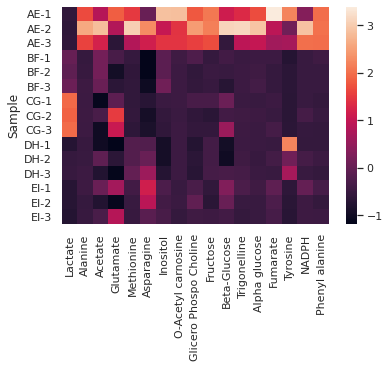

In [48]:
#make a heatmap after standardization
sns.set_theme()
sns.heatmap(indexed.drop(columns=['Status']))
plt.show()

![7.5_heatmap](BIC3007/7.5_heatmap.PNG)

### PCA

In [49]:
# split data into features (X) and labels (y). 
# features (X) disini merujuk pada value dari masing-masing senyawa 
# labels (Y) merujuk pada Status tiap sample
X = merge_raw.values
Y = metadata.values

In [50]:
seed = 0
ndimensions = 2 #tergantung berapa dimensi PCA yang ingin dibuat

pca = PCA(n_components=ndimensions, random_state=seed)
pca.fit(raw_scaled)
X_pca_array = pca.transform(raw_scaled)
X_pca = pd.DataFrame(X_pca_array, columns=['PC1','PC2']) # PC=principal component
X_pca.head(5)

,PC1,PC2
0,6.799914,1.100210
1,8.778472,0.148174
2,4.594290,-1.343235
3,-1.703889,0.256836
4,-1.903232,-0.217880


In [51]:
nclusters = 2 #this is the k in kmeans. 
#Terhgantung berapa banyak kelompok yang ingin dibuat. Clue: Perhatikan berapa banyak status

km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(raw_scaled)

# predict the cluster for each data point
y_cluster_kmeans = km.predict(raw_scaled)
y_cluster_kmeans

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [52]:
Y2 = pd.Categorical(merge_raw['Status'].values).codes #!!! #Mengubah string/kata menjadi angka
y_id_array2 = Y2

df_plot = X_pca.copy()
df_plot['ClusterKmeans'] = y_cluster_kmeans
df_plot['Status'] = y_id_array2 # also add actual labels so we can use it in later plots

df_plot.head(5)

,PC1,PC2,ClusterKmeans,Status
0,6.799914,1.100210,1,1
1,8.778472,0.148174,1,1
2,4.594290,-1.343235,1,1
3,-1.703889,0.256836,0,0
4,-1.903232,-0.217880,0,0


In [53]:
def plotData(df, groupby):
    "make a scatterplot of the first two principal components of the data, colored by the groupby field"
    
    # make a figure with just one subplot.
    # you can specify multiple subplots in a figure, 
    # in which case ax would be an array of axes,
    # but in this case it'll just be a single axis object.
    fig, ax = plt.subplots(figsize = (7,7))

    # color map
    cmap = mpl.cm.get_cmap('prism')

    # we can use pandas to plot each cluster on the same graph.
    # see http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html
    for i, cluster in df.groupby(groupby):
        cluster.plot(ax = ax, # need to pass this so all scatterplots are on same graph
                     kind = 'scatter', 
                     x = 'PC1', y = 'PC2',
                     color = cmap(i/(nclusters-1)), # cmap maps a number to a color
                     label = "%s %i" % (groupby, i), 
                     s=30) # dot size
    ax.grid()
    ax.axhline(0, color='black')
    ax.axvline(0, color='black')
    ax.set_title("Principal Components Analysis");

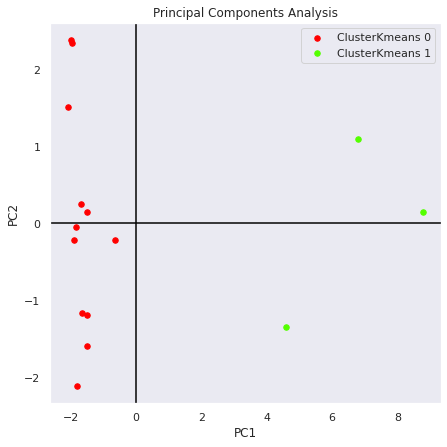

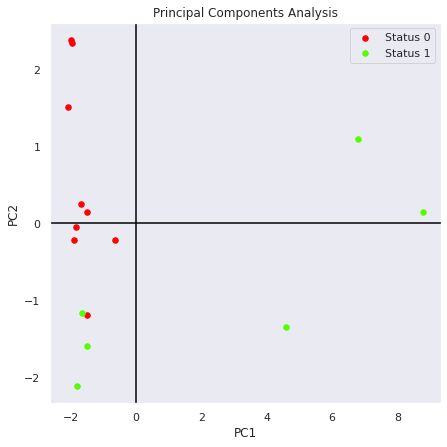

In [54]:
# plot the clusters each datapoint was assigned to
plotData(df_plot, 'ClusterKmeans')
plotData(df_plot, 'Status')

![7.8_PCA_plotcluster](BIC3007/7.8_PCA_plotcluster.PNG)
![7.8_PCA_plotstatus](BIC3007/7.8_PCA_plotstatus.PNG)

**Pertanyaan**
* Berdasarkan PCA K-means, berapa banyak sample yang memiliki fenotip tahan?
* Bandingkan antara PCA K-means dengan PCA status. Apakah terdapat perbedaan? Jika iya, coba interpretasikan hasil kedua PCA yang anda lihat?

**Jawaban**
* (Tulisakan jawaban disini)